In [80]:
''' Do not change this cell '''
#Functions

def check_gpu():
  if tf.test.gpu_device_name() != '':
    print("GPU sucessfully connected")
  else: print("PLease connect GPU")

def check_data():
  a = set()
  for image in Images:
    a.add(Image.shape[2])
  if len(a)==1 and len(Images)==624:
    print("PASS")
  else: print("FAIL")

In [1]:
#Import any library here only.
import os
import matplotlib.pyplot as plt
from PIL import Image,ImageEnhance

## <font color='orange'>Task #1</font>

Data loading and understanding data

In [82]:
#Setup and check a gpu connection.


In [83]:
''' Do not change this cell '''
check_gpu()

PLease connect GPU


In [84]:
#Create two lists, images and labels. Store Input images in 'Images' list and its labels in 'Labels' list.
#Infected Images have two categories viral and bacterial. Find Number of images in each class. (Hint: See image name)
#Note that images are of different sizes.


In [2]:

data_dir = 'OpenCodeData/OpenCodeData'  

images = []
labels = []

viral_count = 0
bacterial_count = 0

for root, dirs, files in os.walk(data_dir):
    for filename in files:
        if filename.endswith('.jpeg'):
            img_path = os.path.join(root, filename)
            if 'virus' in filename:
                labels.append('VIRAL')
                viral_count += 1
            elif 'bacteria' in filename:
                labels.append('BACTERIAL')
                bacterial_count += 1
            else:
                labels.append('NORMAL')  
            
            images.append(img_path)

print(f"Number of Viral Images: {viral_count}")
print(f"Number of Bacterial Images: {bacterial_count}")


Number of Viral Images: 148
Number of Bacterial Images: 242


In [86]:
''' Do not change this cell '''
check_data("task1")

TypeError: check_data() takes 0 positional arguments but 1 was given

In [ ]:
#Plot 5 images each of normal and infected category.
#Also do neccessary labelings. Make sure your plots have all necessary details and looks good :)
#You can customise your plots as per your wish.


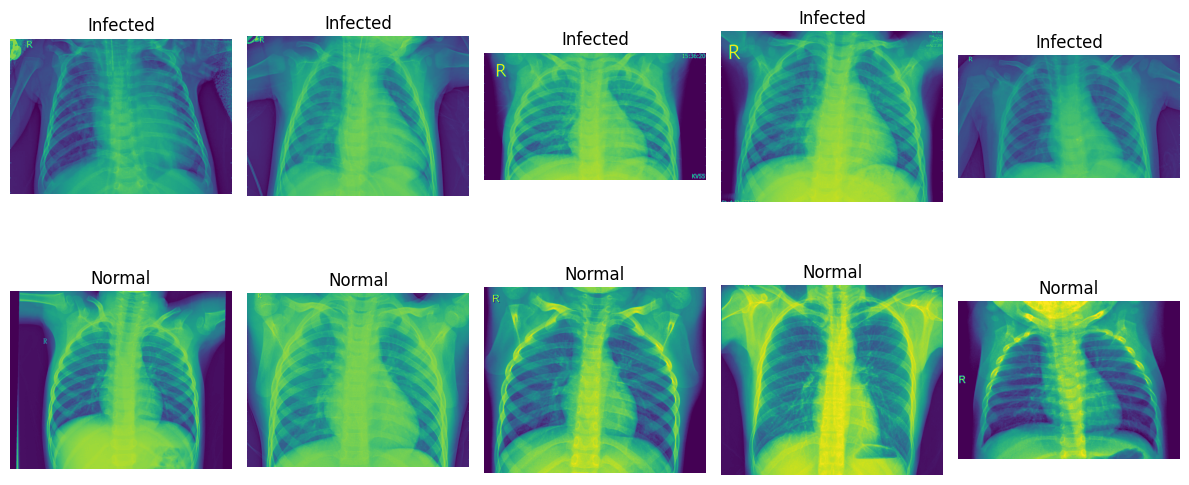

In [3]:

infected_folder = 'OpenCodeData/OpenCodeData/INFECTED/'
normal_folder = 'OpenCodeData/OpenCodeData/NORMAL/'

infected_images = [infected_folder + img for img in os.listdir(infected_folder)]
normal_images = [normal_folder + img for img in os.listdir(normal_folder)]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    img = Image.open(infected_images[i])
    plt.imshow(img)
    plt.title("Infected")
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    img = Image.open(normal_images[i])
    plt.imshow(img)
    plt.title("Normal")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    resized_img = img.resize((128, 128))


    return resized_img

processed_images = []
for img_path in images:
    processed_img = preprocess_image(img_path)
    processed_images.append(processed_img)

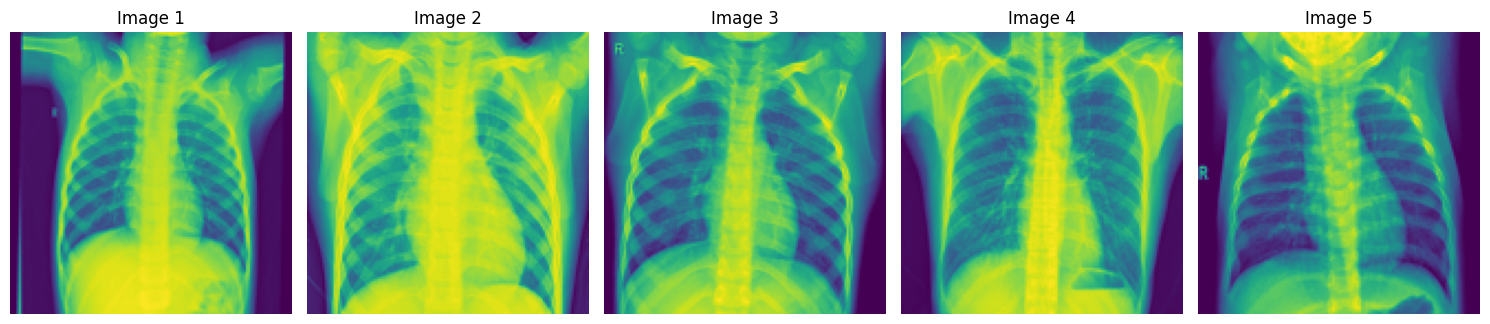

In [5]:
import matplotlib.pyplot as plt

num_images_to_plot = 5

fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i in range(num_images_to_plot):
    axes[i].imshow(processed_images[i])
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

train_images, test_val_images, train_labels, test_val_labels = train_test_split(
    processed_images, labels, test_size=0.2, random_state=42)

test_images, val_images, test_labels, val_labels = train_test_split(
    test_val_images, test_val_labels, test_size=0.5, random_state=42)

In [7]:
def augment_images_inplace(images_list, labels_list):
    augmented_images = []
    augmented_labels = []

    for img, label in zip(images_list, labels_list):
        # Rotating images
        rotated_images = [img.rotate(angle) for angle in [10, -10, 20, -20]]
        
        # Appending rotated images with their respective labels
        for rotated_img in rotated_images:
            augmented_images.append(rotated_img)
            augmented_labels.append(label)

        # Flipping the image and enhancing brightness
        flipped_image = img.transpose(Image.FLIP_LEFT_RIGHT)
        enhanced_image = ImageEnhance.Brightness(img).enhance(1.5)

        # Appending flipped and enhanced images along with labels
        augmented_images.extend([flipped_image, enhanced_image])
        augmented_labels.extend([label, label])

    return augmented_images, augmented_labels

augmented_train_images, augmented_train_labels = augment_images_inplace(train_images, train_labels)




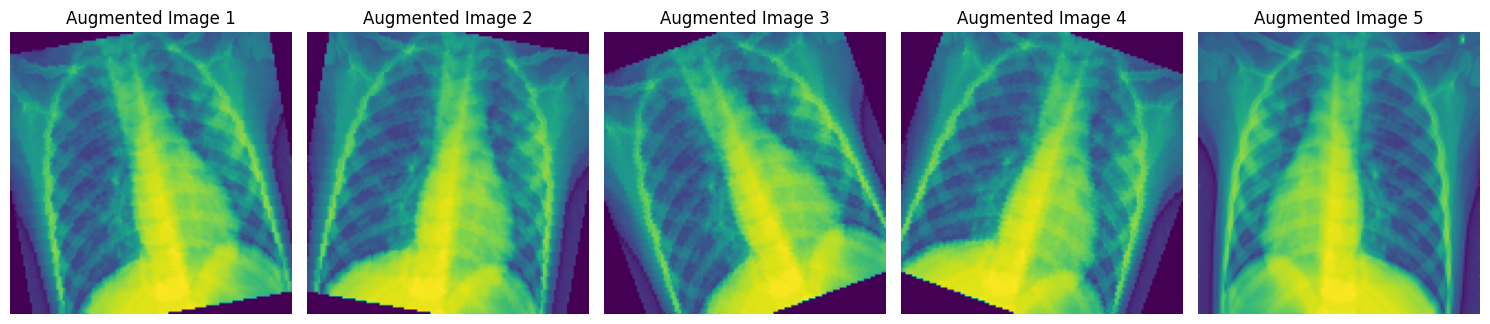

In [8]:
import matplotlib.pyplot as plt

num_images_to_plot = 5

fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i in range(num_images_to_plot):

    axes[i].imshow(augmented_train_images[i])
    axes[i].axis('off')
    axes[i].set_title(f"Augmented Image {i+1}")

plt.tight_layout()
plt.show()

In [9]:
print(len(augmented_train_labels),len(augmented_train_images))

2994 2994


In [10]:
import numpy as np
augmented_train_images = np.array([np.array(img) for img in augmented_train_images])
augmented_train_images = np.expand_dims(augmented_train_images, axis=-1)  

augmented_train_images = augmented_train_images / 255.0
augmented_train_labels = np.array(augmented_train_labels)

val_images = np.array([np.array(img) for img in val_images])
val_images = np.expand_dims(val_images, axis=-1)
# test_images = np.array([np.array(img) for img in test_images])
# test_images = np.expand_dims(test_images, axis=-1)
val_images = val_images / 255.0
val_labels = np.array(val_labels)


In [11]:
print(augmented_train_images.shape)


(2994, 128, 128, 1)


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

label_mapping = {'VIRAL': 0, 'BACTERIAL': 1, 'NORMAL': 2}

encoded_train_labels = [label_mapping[label] for label in augmented_train_labels]
encoded_val_labels = [label_mapping[label] for label in val_labels]
encoded_train_labels = np.array(encoded_train_labels)
encoded_val_labels = np.array(encoded_val_labels)


model.fit(augmented_train_images, encoded_train_labels, epochs=10, batch_size=32, validation_data=(val_images, encoded_val_labels))


2023-12-19 03:24:20.298998: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 03:24:20.334434: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 03:24:20.552235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 03:24:20.552377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 03:24:20.602615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Epoch 1/10
94/94 [==============================] - 12s 120ms/step - loss: 0.8230 - accuracy: 0.6236 - val_loss: 0.4782 - val_accuracy: 0.8571
Epoch 2/10
94/94 [==============================] - 12s 123ms/step - loss: 0.5192 - accuracy: 0.7882 - val_loss: 0.3957 - val_accuracy: 0.8889
Epoch 3/10
94/94 [==============================] - 12s 124ms/step - loss: 0.4281 - accuracy: 0.8380 - val_loss: 0.3920 - val_accuracy: 0.8889
Epoch 4/10
94/94 [==============================] - 12s 125ms/step - loss: 0.3431 - accuracy: 0.8697 - val_loss: 0.3418 - val_accuracy: 0.8889
Epoch 5/10
94/94 [==============================] - 12s 126ms/step - loss: 0.2717 - accuracy: 0.8965 - val_loss: 0.4033 - val_accuracy: 0.8571
Epoch 6/10
94/94 [==============================] - 12s 127ms/step - loss: 0.2228 - accuracy: 0.9148 - val_loss: 0.3353 - val_accuracy: 0.8571
Epoch 7/10
94/94 [==============================] - 12s 128ms/step - loss: 0.1630 - accuracy: 0.9422 - val_loss: 0.2945 - val_accuracy: 0.9048

2/2 [==============================] - 0s 32ms/step


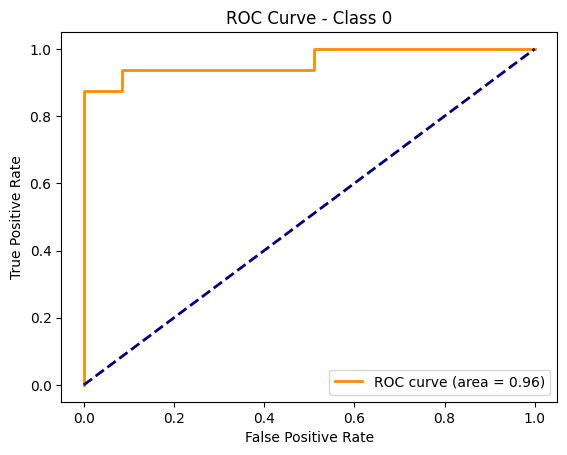

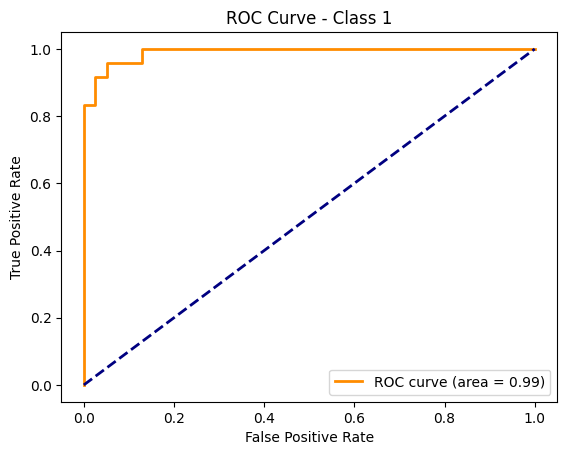

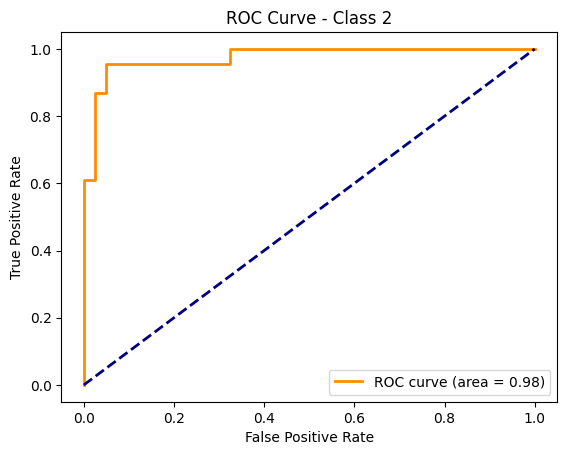

In [13]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

predicted_probs = model.predict(val_images)

for class_index in range(3):
    binary_labels = (encoded_val_labels == class_index).astype(int)
    
    fpr, tpr, _ = roc_curve(binary_labels, predicted_probs[:, class_index])
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Class {class_index}')
    plt.legend(loc="lower right")
    plt.show()


In [14]:
predicted_probs = model.predict(val_images)

for class_index in range(3):
    binary_labels = (encoded_val_labels == class_index).astype(int)
    
    fpr, tpr, _ = roc_curve(binary_labels, predicted_probs[:, class_index])
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Class {class_index}')
    plt.legend(loc="lower right")
    
    plt.savefig(f'ROC_Class_{class_index}.jpeg', format='jpeg')
    plt.close()


2/2 [==============================] - 0s 28ms/step


In [15]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

predictions = model.predict(val_images)

predicted_labels = np.argmax(predictions, axis=1)

print("Accuracy:", accuracy_score(encoded_val_labels, predicted_labels))
print("F1 Score:", f1_score(encoded_val_labels, predicted_labels, average='weighted'))  # Choose average type as needed
print("Classification Report:")
print(classification_report(encoded_val_labels, predicted_labels))


2/2 [==============================] - 0s 32ms/step
Accuracy: 0.9365079365079365
F1 Score: 0.936442229711878
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.92      0.96      0.94        24
           2       0.92      0.96      0.94        23

    accuracy                           0.94        63
   macro avg       0.95      0.93      0.94        63
weighted avg       0.94      0.94      0.94        63



In [16]:
model.save('My_model.h5')


/home/outbreakkp/anaconda3/envs/nlp/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
test_images = np.array([np.array(img) for img in test_images])
test_images = np.expand_dims(test_images, axis=-1)
test_images = test_images / 255.0

test_labels = np.array([label_mapping[label] for label in test_labels])


In [20]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

test_predictions = model.predict(test_images)

predicted_test_labels = np.argmax(test_predictions, axis=1)

test_accuracy = accuracy_score(test_labels, predicted_test_labels)
test_roc_auc = roc_auc_score(test_labels, test_predictions, multi_class='ovr', average='weighted')  # For multi-class AUC

print("Test Accuracy:", test_accuracy)
print("Test ROC-AUC Score:", test_roc_auc)


2/2 [==============================] - 0s 31ms/step
Test Accuracy: 0.8870967741935484
Test ROC-AUC Score: 0.9737924788683802
